<a href="https://colab.research.google.com/github/GraceAderonmu/Data-Analytics-Foundations/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section will be to import and analyze my data; my data set is from Nyc Open Data and it is a collation of most populous names that different ethnicities name their children from 2011-2018. I will be comparing names from different ethnic groups


In [ ]:
import pandas as pd
import numpy as py
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import classification_report

In [ ]:
df= pd.read_csv('/content/Popular_Baby_Names.csv')
df


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
49504,2018,FEMALE,BLACK NON HISPANIC,Nala,10,40
49505,2018,FEMALE,BLACK NON HISPANIC,Royalty,10,40
49506,2018,FEMALE,BLACK NON HISPANIC,Sariyah,10,40
49507,2018,FEMALE,BLACK NON HISPANIC,Simone,10,40


In [ ]:
df.shape

(49509, 6)

In [ ]:
df.describe()

,Year of Birth,Count,Rank
count,49509.000000,49509.000000,49509.000000
mean,2013.407421,33.839807,57.032418
std,2.145505,38.877785,25.504754
min,2011.000000,10.000000,1.000000
25%,2012.000000,13.000000,38.000000
50%,2013.000000,20.000000,58.000000
75%,2014.000000,36.000000,78.000000
max,2019.000000,426.000000,102.000000


In [ ]:
df.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

In [ ]:
df.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62
6,2011,FEMALE,HISPANIC,HAILEY,126,8
7,2011,FEMALE,HISPANIC,HALEY,14,74
8,2011,FEMALE,HISPANIC,HANNAH,17,71
9,2011,FEMALE,HISPANIC,HAYLEE,17,71


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49509 entries, 0 to 49508
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       49509 non-null  int64 
 1   Gender              49509 non-null  object
 2   Ethnicity           49509 non-null  object
 3   Child's First Name  49509 non-null  object
 4   Count               49509 non-null  int64 
 5   Rank                49509 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [ ]:
df[["Child's First Name","Count","Year of Birth","Gender","Ethnicity"]].max()

Child's First Name                Zyaire
Count                                426
Year of Birth                       2019
Gender                              MALE
Ethnicity             WHITE NON HISPANIC
dtype: object

Here I am looking for missing values and will attempt to visualize my finding - No missing values found


In [ ]:
missing_values = ["n/a", "na", "s", "--", "(null)"]
df = pd.read_csv('/content/Popular_Baby_Names.csv', na_values = missing_values)
df.isnull().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

We see below, the most popular name in the hispanic community in 2014 is 'Avery'

In [ ]:
df.mode()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2014,FEMALE,HISPANIC,Avery,10,77


Here I was trying to figure out the count of unique entries in that Child's First Name column. We see output here in my visualization below

In [ ]:
df.value_counts()

Year of Birth  Gender  Ethnicity                   Child's First Name  Count  Rank
2011           FEMALE  ASIAN AND PACIFIC ISLANDER  ABIGAIL             24     24      5
2013           MALE    ASIAN AND PACIFIC ISLANDER  Owen                54     18      5
                                                   Oliver              31     36      5
                                                   Nolan               10     57      5
                                                   Nathaniel           21     46      5
                                                                                     ..
2016           MALE    BLACK NON HISPANIC          Chase               65     14      1
                                                   Christian           61     16      1
                                                   Christopher         44     25      1
                                                   Connor              11     56      1
2019           MALE    WHITE NON HISP

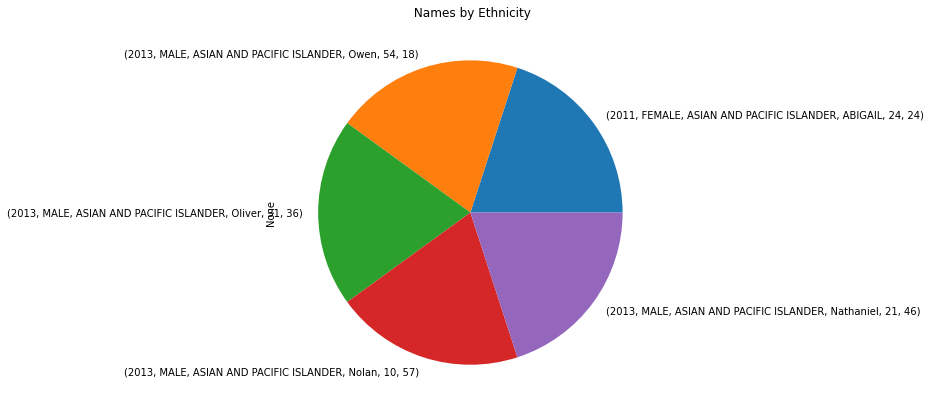

In [ ]:
df.value_counts().iloc[:5].plot(kind="pie", title = " Names by Ethnicity", figsize=(7,7))


Data Transformation - I am attempting converting columns to different data types

In [ ]:
df[['Year of Birth','Count']] = df[['Year of Birth','Count']].astype('int64')
print(df.dtypes)



Year of Birth          int64
Gender                object
Ethnicity             object
Child's First Name    object
Count                  int64
Rank                   int64
dtype: object


Digging deeper into my analysis- can I get the most popular name by ethnicity in one year?


In [ ]:
df.groupby('Ethnicity')['Year of Birth'].max()


Ethnicity
ASIAN AND PACI                2012
ASIAN AND PACIFIC ISLANDER    2019
BLACK NON HISP                2012
BLACK NON HISPANIC            2019
HISPANIC                      2019
WHITE NON HISP                2012
WHITE NON HISPANIC            2019
Name: Year of Birth, dtype: int64

In [ ]:
df.groupby('Gender')['Year of Birth'].count()


Gender
FEMALE    25275
MALE      24234
Name: Year of Birth, dtype: int64

In [ ]:
df.groupby("Child's First Name")['Year of Birth'].max()


Child's First Name
AALIYAH    2012
AARAV      2012
AARON      2012
AAYAN      2012
ABBY       2012
           ... 
Zoey       2019
Zora       2019
Zoya       2019
Zuri       2019
Zyaire     2019
Name: Year of Birth, Length: 3211, dtype: int64

In [ ]:
df.groupby("Ethnicity")["Child's First Name"].max()


Ethnicity
ASIAN AND PACI                  ZOEY
ASIAN AND PACIFIC ISLANDER      Zoya
BLACK NON HISP                  ZURI
BLACK NON HISPANIC            Zyaire
HISPANIC                        Zuri
WHITE NON HISP                  ZOEY
WHITE NON HISPANIC              Zoey
Name: Child's First Name, dtype: object

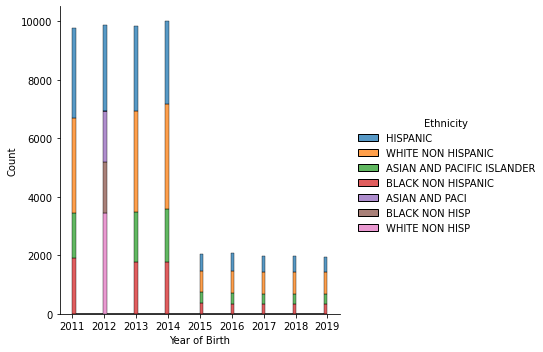

In [ ]:
sns.displot(data=df, x="Year of Birth", hue="Ethnicity", multiple="stack")


I tried here to name my dataframe in order to plot a graph but it threw me an error, but I left it here so I can find out step I may have missed

In [ ]:
YearofBirth = ['2011', '2012', '2013','2014', '2015', '2016','2017','2018','2019']
Ethnicgroup=['ASIAN AND PACI','ASIAN AND PACIFIC ISLANDER','BLACK NON HISP','BLACK NON HISPANIC','HISPANIC','WHITE NON HISP','WHITE NON HISPANIC' ]
Childname =['ZOEY','Zoya','ZURI','Zyaire','Zuri','ZOEY','Zoey']


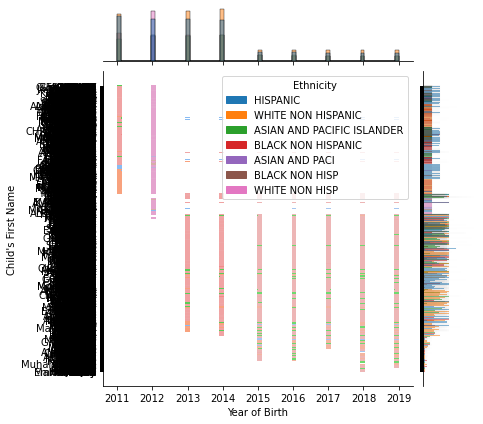

In [ ]:
sns.jointplot(data=df, x="Year of Birth", y="Child's First Name", hue="Ethnicity", kind="hist")


In [ ]:
sns.jointplot(data=df, x="Ethnicity", y="Year of Birth", hue="Child's First Name", kind="hist")
